# Funciones Acumulativas

Las funciones acumulativas nos permiten trabajar en la fila "n" de una tabla con todos los datos de las filas "0 a n"
<br>Dentro de este tipo de funciones encontramos:

* cummax()  El máximo acumulado (ideal para máximo histórico por fecha)
* cummin()  El mínimo acumulado (ideal para mínimo histórico por fecha)
* cumsum() La suma acumulada (ideal para armado se subtotales por fecha)
* cumprod() El producto acumulado (ideal para rendimiento compuesto)

## Cummax()

El uso típico que le vamos a dar a esta función es para saber el máximo histórico de una serie en cada punto de la misma

In [2]:
import pandas as pd
data = pd.read_excel('excels_csvs/AAPL.xlsx')
data = data.sort_values(by='timestamp',ascending=True)
data = data.drop(["high","low","volume"], axis=1).set_index("timestamp")

data['maxHist'] = data.adjusted_close.cummax()
data.head(6)

,open,close,adjusted_close,maxHist
timestamp,,,,
2000-03-06,126.00,125.69,3.8960,3.8960
2000-03-07,126.44,122.87,3.8086,3.8960
2000-03-08,122.87,122.00,3.7816,3.8960
2000-03-09,120.87,122.25,3.7894,3.8960
2000-03-10,121.69,125.75,3.8979,3.8979
2000-03-13,122.12,121.31,3.7602,3.8979


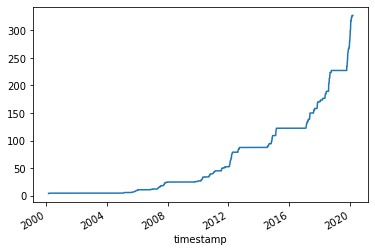

In [3]:
data.maxHist.plot()

## Cummin()

Obviamente es lo mismo que el cummax pero para mínimos, la combinación de cummax() y cummin() va a ser muy util para backtestings de drawdowns y recuperaciones posteriores

In [4]:
data = pd.read_excel('excels_csvs/AAPL.xlsx')
data = data.sort_values(by='timestamp',ascending=True)
data = data.drop(["high","low","volume"], axis=1).set_index("timestamp")

data['minHist'] = data.adjusted_close.cummin()
data.head(6)

,open,close,adjusted_close,minHist
timestamp,,,,
2000-03-06,126.00,125.69,3.8960,3.8960
2000-03-07,126.44,122.87,3.8086,3.8086
2000-03-08,122.87,122.00,3.7816,3.7816
2000-03-09,120.87,122.25,3.7894,3.7816
2000-03-10,121.69,125.75,3.8979,3.7816
2000-03-13,122.12,121.31,3.7602,3.7602


## Cumsum()

Cumsum() es obviamente una funcion de sumas acumuladas, que en la posicion de la fila "n" nos devuelve la suma de "0 a n" (inclusive)

$$ \large cumsum\hspace{3mm}(X_{n})\hspace{3mm}  =  \hspace{3mm} \sum_{i=0}^{n}x_{i} $$

En el ejemplo aprovechamos para borrar las columnas de OHLC par limpiar un poco la salida con la función drop()

In [5]:
data = pd.read_excel('excels_csvs/AAPL.xlsx')
data = data.sort_values(by='timestamp',ascending=True)

data['volumenAcum'] = data.volume.cumsum()/1000000
data = data.drop(['open','high','low','close'],1).dropna().round(2)
data.set_index('timestamp',inplace=True)
data.head(6)

,adjusted_close,volume,volumenAcum
timestamp,,,
2000-03-06,3.90,1880000,1.88
2000-03-07,3.81,2437600,4.32
2000-03-08,3.78,2421700,6.74
2000-03-09,3.79,2470700,9.21
2000-03-10,3.90,2219700,11.43
2000-03-13,3.76,2713900,14.14


In [ ]:
data.volumenAcum.plot()

## Cumprod()

In [11]:
v = [0.02, 0.05, -0.04]
v = np.array(v)
f = v + 1


ci =  100
c1 = ci * f[0]

c2 = c1 * f[1]

c3 = c2 * f[2]
c3

102.816

In [ ]:
v = [0.02, 0.05, -0.04]
v = np.array(v)
f = v + 1


ci =  100
c1 = ci * f[0]

c2 = ci * f[0] * f[1]

c3 = ci * f[0] * f[1] * f[2]
c3

Cumprod() es una función de productorio, es decir el producto acumulado de 0 a n, para la fila n 

$$ \large cumprod\hspace{3mm}(X_{n})\hspace{3mm}  =  \hspace{3mm} \prod_{i=0}^{n}x_{i} $$

Vamos a usar esta fórmula para calcular rendimiento compuesto, es muy sencillo:
<br>  1- Creamos una columna "variacion" con el valor "r", rendimiento porcentual diario.
<br>  2- Creamos una columna "factor" con el valor (1+r)
<br>  2- Luego vamos a aplicar el productorio para cada fila de esa columna "factor" y le restamos 1 al resultado.

In [6]:
data = pd.read_excel('excels_csvs/AAPL.xlsx')
data = data.sort_values(by='timestamp',ascending=True)

data['variacion'] = data['adjusted_close'].pct_change()
data['factor'] = 1 + data['variacion'] 
data['rendimientoAcum'] = (data.factor.cumprod()-1)*100

data = data.drop(['open','high','low','close','volume'],1).dropna().round(4).set_index("timestamp")
data

,adjusted_close,variacion,factor,rendimientoAcum
timestamp,,,,
2000-03-07,3.8086,-0.0224,0.9776,-2.2433
2000-03-08,3.7816,-0.0071,0.9929,-2.9363
2000-03-09,3.7894,0.0021,1.0021,-2.7361
2000-03-10,3.8979,0.0286,1.0286,0.0488
2000-03-13,3.7602,-0.0353,0.9647,-3.4856
...,...,...,...,...
2020-03-02,298.8100,0.0931,1.0931,7569.6612
2020-03-03,289.3200,-0.0318,0.9682,7326.0780
2020-03-04,302.7400,0.0464,1.0464,7670.5339


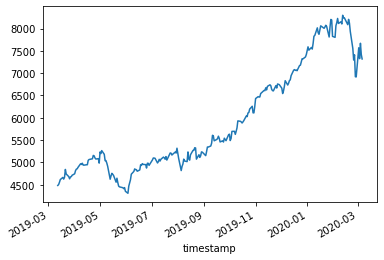

In [13]:
dataf = data.iloc[-250:]
dataf.rendimientoAcum.plot()

## Rolling vs Acumulativas (diferencias)
* cummax vs rolling(n).max()
* cummin vs rolling(n).min()
* cumsum vs rolling(n).sum()



# Agrupamiento

In [14]:
import pandas as pd

data = pd.read_excel('excels_csvs/SPY.xlsx')
data = data.sort_values('timestamp',ascending=True).set_index("timestamp")
data

,open,high,low,close,adjusted_close,volume
timestamp,,,,,,
2000-03-06,140.8125,141.3437,138.7500,139.7500,96.0516,11967100
2000-03-07,140.0000,140.1562,135.2187,137.0468,94.1937,20062000
2000-03-08,136.4687,137.8437,135.0312,136.8750,94.0756,11808500
2000-03-09,137.2500,140.8750,136.1250,140.8750,96.8248,5500900
2000-03-10,140.1875,142.0000,139.5312,140.1250,96.3093,7924600
...,...,...,...,...,...,...
2020-04-03,250.7600,253.3200,245.2200,248.1900,248.1900,134538553
2020-04-06,257.8400,267.0000,248.1698,264.8600,264.8600,186692564
2020-04-07,274.2100,275.0300,264.8900,265.1300,265.1300,199187791


## Agrupamiento por columnas o toda la tabla

In [15]:
data = pd.read_excel('excels_csvs/SPY.xlsx')
data = data.sort_values('timestamp',ascending=True).set_index("timestamp")
data['variacion'] = data.adjusted_close.pct_change()

pd.options.display.max_rows = 10

agrupados = data.volume.groupby(data.index.dayofweek).sum()


agrupados

timestamp
0     95157771129
1    115682363236
2    120629310698
3    121977842455
4    120574665088
Name: volume, dtype: int64

In [16]:
data = pd.read_excel('excels_csvs/SPY.xlsx')
data = data.sort_values('timestamp',ascending=True).set_index("timestamp", drop=False)
data['variacion'] = data.adjusted_close.pct_change()
agrupados = data.adjusted_close.groupby(data.index.to_period('Q')).last()

agrupados

timestamp
2000Q1    103.6151
2000Q2    100.3432
2000Q3     99.4543
2000Q4     91.1271
2001Q1     81.2860
            ...   
2019Q2    290.2265
2019Q3    295.3244
2019Q4    321.8600
2020Q1    257.7500
2020Q2    278.2000
Freq: Q-DEC, Name: adjusted_close, Length: 82, dtype: float64

## Métodos para concatenar a los agrupamientos

Así como usamos la funcón count() podemos usar otro tipo de funciones, por ejemplo:
* first()
* last()
* min()
* max()
* sum()
* prod()
* mean()
* median()
* std() desvio estandar (sigma)
* var() varianza (sigma^2)
* skew()  (Coeficiente de asimetria)
* kurtosis() 
* quantile()  

## Criterios de agrupamiento del tipo fechas

# Mas funciones

## Clip (Acotado)
Esta función "acota" los valores de una columna entre un mínimo y un máximo, es muy útil para descartar la incidencia de "outliers" o "datos aberrantes" o "valores de colas" o simplemente "errores" del data feed

In [17]:
tabla = pd.read_excel('excels_csvs/AAPL_SPY_QQQ.xlsx')
tabla.set_index("timestamp",inplace=True)
tabla.tail(8)

,AAPL,SPY,QQQ
timestamp,,,
2020-02-26,1.586365,-0.367823,0.515392
2020-02-27,-6.536819,-4.491172,-5.007391
2020-02-28,-0.058497,-0.420154,0.077806
2020-03-02,9.310067,4.330656,5.160350
2020-03-03,-3.175931,-2.863244,-3.206728
2020-03-04,4.638463,4.203304,4.172236
2020-03-05,-3.243707,-3.324171,-3.038218
2020-03-06,-1.328008,-1.653111,-1.687225


Supongamos que no queremos considerar los valores superiores a +8% o los inferiores a -8% y queremos "topearlos" en esos límites

In [18]:
tabla = pd.read_excel('excels_csvs/AAPL_SPY_QQQ.xlsx')    
tabla.set_index("timestamp",inplace=True)
tabla_acotada = tabla.clip(-6,8)
tabla_acotada.tail(8)

,AAPL,SPY,QQQ
timestamp,,,
2020-02-26,1.586365,-0.367823,0.515392
2020-02-27,-6.000000,-4.491172,-5.007391
2020-02-28,-0.058497,-0.420154,0.077806
2020-03-02,8.000000,4.330656,5.160350
2020-03-03,-3.175931,-2.863244,-3.206728
2020-03-04,4.638463,4.203304,4.172236
2020-03-05,-3.243707,-3.324171,-3.038218
2020-03-06,-1.328008,-1.653111,-1.687225


como vemos en el dato del 2 de marzo de 2020, que teníamos un 9.31, lo cambió por 8 que era nuestro "tope"

## Funciones Estadísticas Báscias
Gracias a pandas tenemos a disposición de un clic las siguientes funcones estadísticas básicas:
* Valor máximo: max()
* Valor mínimo: min()
* Indice de valores mínimos y máximos: idxmin() e idxmax()
* Media: mean()
* Mediana: madian()
* Producto: prod()  o product()
* Suma: sum()
* Ranking: rank()
* Quantiles: quantile()
* Cantidad de valores únicos: nunique()

Tambien podemos agrupar por otro tipo de datos:
* Cualquier columna discreta (supongamos que tengamos una con True/False)
* Tambíen se puede discretizar un rango continuo pero ya veremos ottras herramientas mas interesantes para eso
* Cualquier otro agrupamiento de fechas:
    * year
    * month
    * week
    * dayofweek
    * mas de un criterio
    * Trimestral: usando to_period('Q') 

In [24]:
tabla['AAPL-ranks'] = tabla.AAPL.rank()
tabla['AAPL-rank_p'] = tabla.AAPL.rank(pct=True)
tabla

,AAPL,SPY,QQQ,AAPL-ranks,AAPL-rank_p
timestamp,,,,,
2000-03-07,-2.243326,-1.934273,-1.518552,602.0,0.119634
2000-03-08,-0.708922,-0.125380,0.907052,1522.0,0.302464
2000-03-09,0.206262,2.922331,3.370767,2674.0,0.531399
2000-03-10,2.863250,-0.532405,-0.434793,4560.0,0.906200
2000-03-13,-3.532671,-1.092729,-2.620053,276.0,0.054849
...,...,...,...,...,...
2020-03-02,9.310067,4.330656,5.160350,5011.0,0.995827
2020-03-03,-3.175931,-2.863244,-3.206728,322.0,0.063990
2020-03-04,4.638463,4.203304,4.172236,4858.0,0.965421


In [25]:
tabla.AAPL.quantile(0.01)

-6.327301325275796

In [26]:
tabla.AAPL.quantile(0.995827)

9.31011051842701

In [37]:
import yfinance as yf
data = yf.download('AAPL')
data['variacion']  = data['Adj Close'].pct_change() * 100
data

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume,variacion
Date,,,,,,,
1980-12-12,0.51,0.52,0.51,0.51,0.40,117258400,NaN
1980-12-15,0.49,0.49,0.49,0.49,0.38,43971200,-5.000000
1980-12-16,0.45,0.45,0.45,0.45,0.36,26432000,-5.263158
1980-12-17,0.46,0.46,0.46,0.46,0.36,21610400,0.000000
1980-12-18,0.48,0.48,0.48,0.48,0.38,18362400,5.555556
...,...,...,...,...,...,...,...
2020-08-20,463.00,473.57,462.93,473.10,473.10,31726800,2.218957
2020-08-21,477.05,499.47,477.00,497.48,497.48,84513700,5.153245
2020-08-24,514.79,515.14,495.75,503.43,503.43,86484400,1.196028


In [38]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,variacion
count,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,1.001100e+04,10010.000000
mean,35.862509,36.237777,35.496513,35.885103,33.721271,8.534559e+07,0.114497
std,66.704129,67.436719,66.058949,66.809060,65.176865,8.567663e+07,2.910707
min,0.200000,0.200000,0.200000,0.200000,0.150000,3.472000e+05,-51.818182
25%,1.080000,1.100000,1.060000,1.080000,0.920000,3.288115e+07,-1.315789
50%,1.750000,1.780000,1.720000,1.750000,1.480000,5.716550e+07,0.000000
75%,39.555000,39.785000,38.945000,39.425000,34.065000,1.062915e+08,1.531243
max,514.790000,515.140000,500.330000,506.090000,506.090000,1.855410e+09,32.786885


In [39]:
data.skew()

Open         2.558409
High         2.569081
Low          2.553393
Close        2.566013
Adj Close    2.730766
Volume       3.502708
variacion   -0.395357
dtype: float64

# Repaso de Estadística

## Desvío Estandrar - Fórmulas

El desvio es el sigma, la varianza es el sigma cuadrado

$$ \large \sigma^2 = \sum_{x=i}^{n} \frac{1}{n} . (X_i - \bar{X} )^2  $$

In [29]:
tabla.std()

AAPL              2.509999
SPY               1.193366
QQQ               1.694009
AAPL-ranks     1452.757469
AAPL-rank_p       0.288704
dtype: float64

## Error estandar - Fórmulas

$$ \Large \frac{\sigma}{\sqrt{n}}$$ 

In [30]:
tabla.sem()

AAPL            0.035384
SPY             0.016823
QQQ             0.023881
AAPL-ranks     20.479663
AAPL-rank_p     0.004070
dtype: float64

## Varianza

In [31]:
tabla.var()

AAPL           6.300093e+00
SPY            1.424123e+00
QQQ            2.869668e+00
AAPL-ranks     2.110504e+06
AAPL-rank_p    8.334988e-02
dtype: float64

## Skew - Fórmulas

$$ \large  skew =  \frac{\mu_3}{\sigma^3}  =  \frac{\sum_{x=i}^{n} \frac{1}{n} . (X_i - \bar{X} )^3}{\sigma^3} $$

## Repaso de Coeficiente de Asimetría

<img src='imagenes/skew.png' style='width:600px;float:left;'>

## Repaso de quantiles, cuartiles, quintiles, deciles, percentiles y blabla_iles

<img src='imagenes/quantiles.png' style='width:600px;float:left;'>

In [40]:
data.variacion.quantile(0.5)

0.0

In [41]:
data.variacion.rank(pct=True)

Date
1980-12-12         NaN
1980-12-15    0.033267
1980-12-16    0.029221
1980-12-17    0.486014
1980-12-18    0.968332
                ...   
2020-08-20    0.824975
2020-08-21    0.961139
2020-08-24    0.711389
2020-08-25    0.315385
2020-08-26    0.731069
Name: variacion, Length: 10011, dtype: float64

In [42]:
data.variacion.quantile(0.048853)

-4.310344827586188

In [43]:
data.variacion['2000-03-07']

-2.319587628865971

## Kurtosis

$$ \Large kurtosis = \frac{\sum_{i=1} (X_i-\bar{X})^4}{n . \sigma^4}$$


Coeficiente de apuntamiento

<div style="width:600px;float:left;">
    <br>La Curtosis nos da una idea de la forma, mientras mas alta, mas valores cerca de la media y mas gruesas las colas
    <ul>
        <li> Leptocúrtica,  Curtosis > 3 (más apuntada y con colas más gruesas que la normal) </li>
        <li> Platicúrtica,  Curtosis < 3 (menos apuntada y con colas menos gruesas que la norma) </li>
        <li> Mesocúrtica,   Curtosis = 3 (tiene una distribución normal) </li>
    </ul>
</div>
<div style="width:350px;float:right;margin-top:-25px;">
    <img src="imagenes/kurtosis.png" style="width:300px;height:230px;">
</div>


In [53]:
data.variacion.kurtosis()

16.84449078609551

In [54]:
data.variacion.skew()

-0.39535682437744896

In [55]:
data.variacion.std()

2.910707238119018

## Covarianza

$$ \large s_{xy}={1 \over n}\sum _{i=1}^{n}{(x_{i}-{\overline {x}})(y_{i}-{\overline {y}})} $$

In [56]:
import yfinance as yf

activos = ['GGAL','YPF','PAM','EDN','BBAR']
data = yf.download(activos, start='2001-01-01', end='2020-08-30')['Adj Close']
tabla = data.pct_change().dropna()*100
tabla

[*********************100%***********************]  5 of 5 downloaded


,BBAR,EDN,GGAL,PAM,YPF
Date,,,,,
2009-10-12,4.815769,5.421687,1.574803,1.199041,-0.654236
2009-10-13,-1.112967,1.714286,0.387597,-2.053712,1.448798
2009-10-14,-1.408290,0.000000,2.702703,-0.483871,0.292113
2009-10-15,-0.858584,-1.460674,-2.819549,-0.648298,1.100324
2009-10-16,-3.312621,1.368301,-1.547389,0.407830,-0.288092
...,...,...,...,...,...
2020-08-20,-2.366864,-1.066667,-1.157184,0.183655,0.000000
2020-08-21,0.606061,0.000000,-1.365854,0.733272,-2.193784
2020-08-24,-0.903614,-5.660377,-0.494560,0.363967,0.934579


### Covarianza contra si mismo

In [57]:
tabla.var()

BBAR    12.691237
EDN     16.080317
GGAL    12.450759
PAM      9.924551
YPF      9.319089
dtype: float64

In [58]:
tabla.GGAL.cov(tabla.GGAL)

12.450759375589737

In [60]:
tabla.GGAL.cov(tabla.EDN)

7.618775598932289

### Matriz de covarianzas

In [59]:
tabla.cov()

,BBAR,EDN,GGAL,PAM,YPF
BBAR,12.691237,7.697730,10.318324,7.328673,5.779539
EDN,7.697730,16.080317,7.618776,7.552293,5.033574
GGAL,10.318324,7.618776,12.450759,7.336769,6.027467
PAM,7.328673,7.552293,7.336769,9.924551,4.700482
YPF,5.779539,5.033574,6.027467,4.700482,9.319089


# Método apply en lugar de concatenar métodos

In [66]:
data = pd.read_excel('excels_csvs/SPY.xlsx')
data = data.sort_values('timestamp',ascending=True).set_index("timestamp", drop=False)
data['variacion'] = data.adjusted_close.pct_change()

data.variacion.groupby(data.index.year).apply(pd.DataFrame.std)

timestamp
2000    0.014596
2001    0.013972
2002    0.016666
2003    0.010421
2004    0.007015
          ...   
2016    0.008232
2017    0.004248
2018    0.010731
2019    0.007879
2020    0.034886
Name: variacion, Length: 21, dtype: float64

In [64]:
data = pd.read_excel('excels_csvs/SPY.xlsx')
data = data.sort_values('timestamp',ascending=True).set_index("timestamp", drop=False)
data['variacion'] = data.adjusted_close.pct_change()

data.variacion.groupby(data.index.year).std()

timestamp
2000    0.014596
2001    0.013972
2002    0.016666
2003    0.010421
2004    0.007015
          ...   
2016    0.008232
2017    0.004248
2018    0.010731
2019    0.007879
2020    0.034886
Name: variacion, Length: 21, dtype: float64

# Ejemplos de concatenado con groupby

In [70]:
data.variacion.groupby(data.index.year).quantile(0.75)

timestamp
2000    0.007558
2001    0.008178
2002    0.008673
2003    0.007152
2004    0.004949
          ...   
2016    0.004508
2017    0.002579
2018    0.005482
2019    0.005872
2020    0.008318
Name: variacion, Length: 21, dtype: float64

In [71]:
data.variacion.groupby(data.index.year).describe()

,count,mean,std,min,25%,50%,75%,max
timestamp,,,,,,,,
2000,208.0,-0.000147,0.014596,-0.057192,-0.009229,-0.000447,0.007558,0.046713
2001,248.0,-0.000407,0.013972,-0.052679,-0.008637,0.000000,0.008178,0.048136
2002,252.0,-0.000827,0.016666,-0.038136,-0.010989,-0.001547,0.008673,0.059662
2003,252.0,0.001040,0.010421,-0.033233,-0.005080,0.001320,0.007152,0.034542
2004,252.0,0.000428,0.007015,-0.018452,-0.003504,0.000830,0.004949,0.016912
...,...,...,...,...,...,...,...,...
2016,252.0,0.000484,0.008232,-0.036431,-0.002798,0.000484,0.004508,0.024382
2017,251.0,0.000792,0.004248,-0.017744,-0.001203,0.000530,0.002579,0.013998
2018,251.0,-0.000128,0.010731,-0.041823,-0.004269,0.000424,0.005482,0.050525


[*********************100%***********************]  1 of 1 downloaded


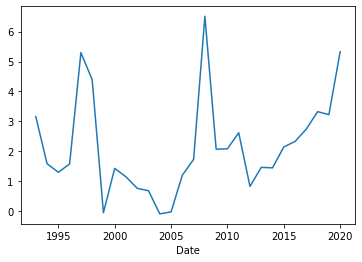

In [72]:
data = yf.download('SPY')
data['variacion'] = data['Adj Close'].pct_change()
data.variacion.groupby(data.index.year).apply(pd.DataFrame.kurtosis).plot()

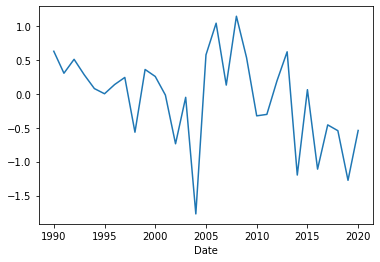

In [74]:
data.variacion.groupby(data.index.year).apply(pd.DataFrame.skew).plot()

[*********************100%***********************]  1 of 1 downloaded


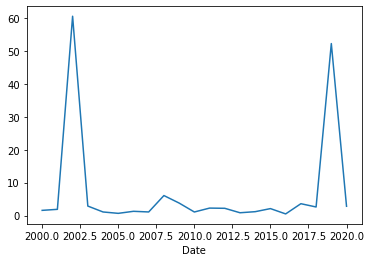

In [78]:
data = yf.download('GGAL', start='1990-01-01')
data['variacion'] = data['Adj Close'].pct_change()
data.variacion.groupby(data.index.year).apply(pd.DataFrame.kurtosis).plot()

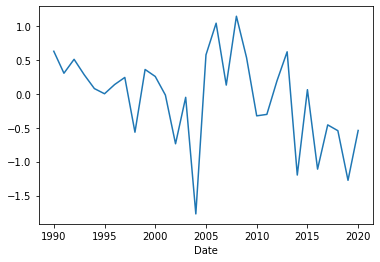

In [76]:
data.variacion.groupby(data.index.year).apply(pd.DataFrame.skew).plot()

### Agrupamiento de booleanos y discretos (Atencion a esto)

De paso vemos el WHERE() en un dataFrame

In [79]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index("timestamp").sort_index()

data['intradiario']  = data.close - data.open
data['cierre_previo']=data['close'].shift()
data['gap_positivo']=data.eval('open>cierre_previo')

# Lo defino por default arbitrariamente
data['vela_color'] = 'Verde'  

# Ahora si pregunto, si se da la condicion dejo el default si no la cambio:
data['vela_color']= data.vela_color.where(data.close > data.open,"Roja")

data

,open,high,low,close,adjusted_close,volume,intradiario,cierre_previo,gap_positivo,vela_color
timestamp,,,,,,,,,,
2000-03-06,126.00,129.13,125.00,125.69,3.8960,1880000,-0.31,NaN,False,Roja
2000-03-07,126.44,127.44,121.12,122.87,3.8086,2437600,-3.57,125.69,True,Roja
2000-03-08,122.87,123.94,118.56,122.00,3.7816,2421700,-0.87,122.87,False,Roja
2000-03-09,120.87,125.00,118.25,122.25,3.7894,2470700,1.38,122.00,False,Verde
2000-03-10,121.69,127.94,121.00,125.75,3.8979,2219700,4.06,122.25,False,Verde
...,...,...,...,...,...,...,...,...,...,...
2020-03-02,282.28,301.44,277.72,298.81,298.8100,85349339,16.53,273.36,True,Verde
2020-03-03,303.67,304.00,285.80,289.32,289.3200,79868852,-14.35,298.81,True,Roja
2020-03-04,296.44,303.40,293.13,302.74,302.7400,54794568,6.30,289.32,True,Verde


#### Agrupando por SIZE o COUNT: Diferencia

In [88]:
data.groupby('gap_positivo').mean().volume

gap_positivo
False    2.323320e+07
True     2.405715e+07
Name: volume, dtype: float64

In [89]:
data.groupby('gap_positivo').intradiario.count()

gap_positivo
False    30.76
True     26.78
Name: intradiario, dtype: float64

In [90]:
data.groupby('gap_positivo').size()

gap_positivo
False    2217
True     2816
dtype: int64

In [94]:
data.groupby('gap_positivo').size().reset_index(name='total')

,gap_positivo,total
0,False,2217
1,True,2816


In [101]:
df = data.groupby(['gap_positivo','vela_color']).size().reset_index(name='dato')
df

,gap_positivo,vela_color,dato
0,False,Roja,1063
1,False,Verde,1154
2,True,Roja,1419
3,True,Verde,1397


In [103]:
df.iloc[1]

gap_positivo    False
vela_color      Verde
dato             1154
Name: 1, dtype: object

# Combinacion de Agrupamiento + Filtros + Ordenamientos

## Agrupamiento con filtros

In [ ]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp').sort_index()

# Calculo las variaciones
data['variaciones'] = data['adjusted_close'].pct_change()*100

# Filtramos las variaciones > 10%
filtro = data.loc[ data['variaciones'] > 10 ]  

# Contabilizamos por año ese filtro
agrupados = filtro.variaciones.groupby(filtro.index.year).count().to_frame()
agrupados.columns = ['Subas +10%']
agrupados

## ¿Y al reves? primero agrupamiento y luego filtro? ¿cuando usar cada variante?

Ejemplo: Ver semanas con rendimiento mayor al 13% (ponele)

In [ ]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp').sort_index()
data['factor']=data.adjusted_close.pct_change()+1

yields = pd.DataFrame()
yields['Yield'] = (data.factor.groupby([data.index.year, data.index.week]).prod() -1)*100
filtro = yields.loc[yields.Yield >13]
filtro

## ¿Y Combinar agrupamiento y ordenamiento? ¿para que sirve esta combinación?

In [ ]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp').sort_index()
data['factor']=data.adjusted_close.pct_change()+1

yields = pd.DataFrame()
yields['Yield'] = (data.factor.groupby([data.index.year, data.index.month]).prod() -1)*100
ordenado = yields.sort_values("Yield", ascending=False)
ordenado.index.names = ['Año','Semana']
ordenado.head(10)

# Resampleo

Mediante el metodo resample podemos reagrupar rapidamente en funcion de diferentes timeframes una serie dada
<br><b>Es importante aclarar que para que funcione el resampleo el indice de la tabla debe ser el timestamp</b>

Las Frecuencias posibles son
* B = business day frequency
* D = calendar day frequency
* W = weekly frequency 
* M = month end frequency 
* BM = business month end frequency 
* MS = month start frequency 
* BMS = business month start frequency 
* Q = quarter end frequency 
* BQ = business quarter endfrequency 
* QS = quarter start frequency 
* BQS = business quarter start frequency 
* A = year end frequency 
* BA = business year end frequency 
* AS = year start frequency 
* BAS = business year start frequency 
* BH = business hour frequency 
* H = hourly frequency 
* T = minutely frequency 
* S = secondly frequency 
* L = milliseonds

## Jugando con la fecha de resampleo y la de la muestra.. ojo ahi

In [ ]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp', drop=False).sort_index()

resampleada = data.resample('10T').last()
resampleada.dropna()

## Cierres al ultimo dia HABIL del mes de cada año

In [ ]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp', drop=False).sort_index()

resampleada = data.resample('BM').last()
resampleada.head(12)

## Cierres cada bimestre

Ojo acá, si ponemos una cantidad "X" antes del tipo de resampleo, me arma la primera muestra y a partir de ella usa esa cantidad

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp', drop=False).sort_index()

cierresBimestrales = data['adjusted_close'].resample('2M').last().to_frame()
cierresBimestrales

## Trabajando con intervalos de minutos

Veamos promero que me levanta del archivo:

In [ ]:
data = pd.read_excel('excels_csvs/AAPL_INTRA.xlsx').set_index('datetime', drop=False).sort_index()
data.head(6)

Como vemos partimos de una serie cada 2 minutos, vamos a resamplearla cada 10 minutos:

In [ ]:
res1 = data['adjusted_close'].resample('10T').last().to_frame()
res1.head()

Acá la resampleamos cada 1 día
<br>Ojo al poner first() tomamos el primer valor de dia, obviamente si ponemos last() tomariamos el ultimo
<br>Del mismo modo si ponemos mean() tomariamos el valor medio

In [ ]:
res2 = data['adjusted_close'].resample('1D').first().to_frame()
res2.columns = ["Apertura"]
res2.head()

Como ven aparecen días sin datos, claramente son feriados y/o sábados y domingos, para sacar esos datos, como ya vimos podemos usar la funcion dropna()

In [ ]:
res2 = data['adjusted_close'].resample('1D').last().to_frame().dropna()
res2.columns = ["Cierre"]
res2.head()

## Armando una tabla de varias columnas con un resampleo

In [ ]:
tabla = data['adjusted_close'].resample('D').mean().to_frame().dropna()
tabla['last'] = data['adjusted_close'].resample('D').last().to_frame()
tabla['first'] = data['adjusted_close'].resample('D').first().to_frame()

tabla.columns = ["Precio Medio","Precio Cierre",'Precio Apertura']

tabla.round(2).head()

# Ajuste de series (ej x gaps)

In [ ]:
import pandas as pd
import analisis_tecnico as at

In [ ]:
data = at.getDataExcel('AAPL')

# Funcion de ajuste de datos
data = at.ajustarOHLC(data)


data['pctChange'] = data.AdjClose.pct_change()
data['Price'] = data.AdjClose
data['Mov']=data.AdjClose.pct_change()*100
data['OpenGap']=(data.Open/data.Close.shift(1)-1)*100
data['IntraMov']=(data.Close/data.Open-1)*100
data.index.name = "Date"

data.dropna(inplace=True)
data

In [ ]:
data.OpenGap.plot()

In [ ]:
data.sort_values('OpenGap').head()

In [ ]:
import matplotlib.pyplot as plt

series = [data.OpenGap,data.IntraMov]
fig, ax = plt.subplots(figsize=(4,6))

ax.boxplot(series, showmeans=True)
ax.set_ylim([-15,15])

plt.xticks([1,2],["GAPS","Intra"])

plt.show()

# Graficos superpuestos

## Ejemplo con pandas directo

In [ ]:
data = at.getDataExcel('AAPL')

# Funcion de ajuste de datos
data = at.ajustarOHLC(data)

data['pctChange'] = data.AdjClose.pct_change()
data['Price'] = data.AdjClose
data['Mov']=data.AdjClose.pct_change()*100
data['OpenGap']=(data.Open/data.Close.shift(1)-1)*100
data['IntraMov']=(data.Close/data.Open-1)*100
data.index.name = "Date"
data.dropna(inplace=True)

In [ ]:
test = data.loc[:,['OpenGap','IntraMov']]
test = (test/100 +1).dropna()


tabla = test.groupby([test.index.year,test.index.month]).prod()-1
tabla.rolling(12).mean().plot()

plt.plot([0]*len(tabla), 'k--')

In [ ]:
tabla

In [ ]:
tabla.abs().sum()

## Ejemplo con matplotlib

In [ ]:
import yfinance as yf
df = yf.download('GGAL')
df['variacion'] = df['Adj Close'].pct_change()
df['volatilidad'] = df['variacion'].rolling(250).std() * 250**0.5
df.dropna(inplace=True)
df

## Escalas diferentes?

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'r-', label='Precio')
ax.plot(df['volatilidad'], 'b--', label='volatilidad')

plt.legend()
plt.show()

## Escalas diferentes

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'r-',  label='Precio')
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(df['volatilidad'], 'k--',  label='volatilidad')
ax2.legend(loc='upper right')

ax2.legend()

plt.show()


## Escalas lineales y logaritmicas juntas

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'g:',label='Precio Log')
ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=14)

ax2 = ax.twinx()
ax2.plot(df['Adj Close'], 'r-',label='Precio Lineal')
ax2.legend(loc='upper right', fontsize=14)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'g:',label='Precio Log')
ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=14)

ax2 = ax.twinx()
ax2.plot(df['Adj Close'], 'r-',label='Precio Lineal')
ax2.set_ylim(0,100)
ax2.legend(loc='upper right', fontsize=14)

plt.show()

# Subplots

## Forma antigua

In [ ]:
import analisis_tecnico as at

data = at.getDataExcel('AAPL')

# Funcion de ajuste de datos
data = at.ajustarOHLC(data)

data['pctChange'] = data.AdjClose.pct_change()
data['Price'] = data.AdjClose
data['Mov']=data.AdjClose.pct_change()*100
data['OpenGap']=(data.Open/data.Close.shift(1)-1)*100
data['IntraMov']=(data.Close/data.Open-1)*100
data.index.name = "Date"
data.dropna(inplace=True)

In [ ]:
plt.figure(figsize=(10,7))

# asigno a la variable ax1 un subplot
# el 211 significa 2 filas, 1 columa, ocupar el 1° lugar
ax1 = plt.subplot(221)
ax1.plot(data.Price)
ax1.set_yscale('log')

# asigno a la variable ax2 otro subplot
# el 212 significa 2 filas, 1 columa, ocupar el 2° lugar
ax2 = plt.subplot(222)
ax2.plot(data.Price)
ax2.set_yscale('linear')

## Forma nueva

In [ ]:
fig, axs = plt.subplots(2, figsize=(10,7))
axs[0].plot(data.Price)
axs[0].set_yscale('log')
axs[0].title.set_text('Escala Logaritmica')
axs[1].plot(data.Price)
axs[1].set_yscale('linear')
axs[1].title.set_text('Escala Lineal')
fig.subplots_adjust(hspace=0.3)

Les dejo exactamente lo mismo pero apilados horizontalmente, solo cambia la línea que define los subplots(filas, columnas) que en lugar de poner subplots(2) (que indica 2 filas) ponemos subplot(1,2) que indica una fila 2 columnas

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
axs[0].plot(data.Price)
axs[0].set_yscale('log')
axs[0].title.set_text('Escala Logaritmica')
axs[1].plot(data.Price)
axs[1].set_yscale('linear')
axs[1].title.set_text('Escala Lineal')
fig.subplots_adjust(hspace=0.4)

Les dejo como ejemplo un básico de precio y volumen

In [ ]:
data = at.getDataExcel('AAPL')
precios2020 = data.loc[(data.index>='2019')]

fig, axs = plt.subplots(2, figsize=(10,5), gridspec_kw={'height_ratios':[2, 1]})
fig.suptitle('Serie AAPL con Volumen', y= 0.94, color='black')

axs[0].plot(precios2020.index, precios2020.AdjClose)
axs[1].bar(precios2020.index, precios2020.Volume)
fig.subplots_adjust(hspace=0)

# Estilos predeterminados

Hay varios estilos predeterminados de colores y tamaños, les dejo el comando para listarlos a todos, después vayan ustedes probando cual les gusta mas, el paquete de estilos se llama con es plt.style y pueden listarlos con plt.style.available o bien pueden seleccionar uno con plt.style.use("nombre_del_estilo_elegido")

In [ ]:
print(plt.style.available)

A continuación dejo algunos ejemplos solo para mostrar que solo cambiando esa línea ya se puede elegir una variedad de estilos bastante diferenciados

In [ ]:
import pandas as pd
import analisis_tecnico as at
import matplotlib.pyplot as plt


data = at.getDataExcel('AAPL')
data = at.ajustarOHLC(data)
data = at.addGap(data)


plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,3))
plt.gca().set_yscale('log')
plt.plot(data.Price)

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(7,3)).suptitle('fivethirtyeight')
plt.gca().set_yscale('log')
plt.plot(data.Price)

Supongamos que me encantó ese diseño pero no quiero que dibuje las grillas
<br>En ese caso hago la captura del objeto ejes y le aplico el método grid() y lo configuro como False

In [ ]:

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,3)).suptitle('fivethirtyeight')

plt.gca().set_yscale('log')
plt.gca().grid(False)

plt.plot(data.Price)

Aplicamoos otro estilo, usemos el seaborn

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(7,3)).suptitle('seaborn')
plt.gca().set_yscale('log')
plt.plot(data.Price)

Pero supongamos que me encantó ese estilo y no me gusto ese color de fondo de los ejes
<br>Entonces podemos aplicar el método set_facecolor("color") a los ejes que debemos capturar

In [ ]:
plt.style.use('seaborn')

plt.figure(figsize=(7,3)).suptitle('seaborn')
plt.gca().set_yscale('log')
plt.gca().set_facecolor("white")
plt.plot(data.Price)

### Gráficos con dos Ejes Y diferentes y el mismo eje X

In [ ]:
import pandas as pd
import analisis_tecnico as at
import matplotlib.pyplot as plt


data = at.getDataExcel('AAPL')
data = at.ajustarOHLC(data)
data = at.addGap(data)
data['STD'] = data.pctChange.rolling(50).std()

fig, ax1 = plt.subplots(figsize=(10,4))
plt.style.use('fivethirtyeight')

fig.suptitle('Precios y Volatilidad SPY')

ax1.set_ylabel('Precios', color="k")
ax1.set_yscale('log')
ax1.plot(data.Price, lw=1, color="k")

ax2 = ax1.twinx()  
ax2.set_ylabel('Volatilidad', color="gray")  
ax2.plot(data.STD, lw=1.5, linestyle="--", color="gray")